<a href="https://colab.research.google.com/github/sathvikdurgapu/Store-Sales-Forecasting/blob/main/Store_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime 
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

In [7]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
#Reading all files 
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx')

In [9]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [10]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


# Missing value Treatment

In [11]:
#finding null values in feature file
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [12]:
#checking null values for file store
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [13]:
#filling null value by mean for unemployement and cpi
feature['Unemployment'].fillna(feature['Unemployment'].mean(),inplace=True)
feature['CPI'].fillna(feature['CPI'].mean(),inplace=True)

In [14]:
#filling null value by zero for markdowns
feature['MarkDown1'] = feature['MarkDown1'].fillna(0)
feature['MarkDown2'] = feature['MarkDown2'].fillna(0)
feature['MarkDown3'] = feature['MarkDown3'].fillna(0)
feature['MarkDown4'] = feature['MarkDown4'].fillna(0)
feature['MarkDown5'] = feature['MarkDown5'].fillna(0)

In [15]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [16]:
#checking for null value again if any left
feature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

# Merging the data

In [17]:
#merging feature, store and train
data = pd.merge(feature, train, on=['Store','Date','IsHoliday'], how='inner')

In [18]:
#merging store also
training = pd.merge(data, store, how='inner',on=['Store'])

In [19]:
#checking data after merging
training.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [20]:
#merging feature, store and test
test_bt = pd.merge(test,feature)
test= pd.merge(test_bt,store)
#checking data after merging
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


# Converting Categorical Variable 'Type' into Numerical Variable 

In [21]:
train_test_data = [training, test]

In [22]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [23]:
#covert categorical into numerical in isholiday (false=0,true=1)
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [24]:
training.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,1,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,1,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,1,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,1,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,1,151315


In [25]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
1,1,2,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
2,1,3,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
3,1,4,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
4,1,5,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315


# Date Features

In [26]:
training['Date'] = pd.to_datetime(training['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [28]:
# Extract date features
training['Date_dayofweek'] =training['Date'].dt.dayofweek
training['Date_month'] =training['Date'].dt.month 
training['Date_year'] =training['Date'].dt.year
training['Date_day'] =training['Date'].dt.day

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

 - Making New Holiday Variable Based on Christmas.

In [29]:
training['Christmas'] = np.where((training['Date']==datetime(2010, 12, 31)) |
                              (training['Date']==datetime(2011, 12, 30)) | 
                              (training['Date']==datetime(2012, 12, 28)) | 
                              (training['Date']==datetime(2013, 12, 27)),1,0)

test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) |
                              (test['Date']==datetime(2011, 12, 30)) | 
                              (test['Date']==datetime(2012, 12, 28)) | 
                              (test['Date']==datetime(2013, 12, 27)),1,0)

[]

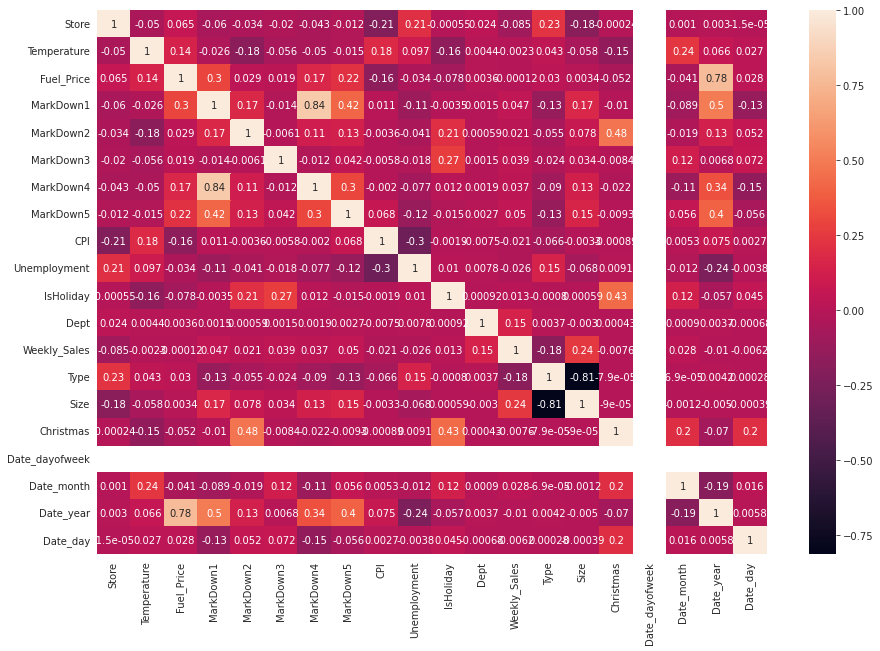

In [30]:
#Checking correlation on training data.
corr = training.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

[]

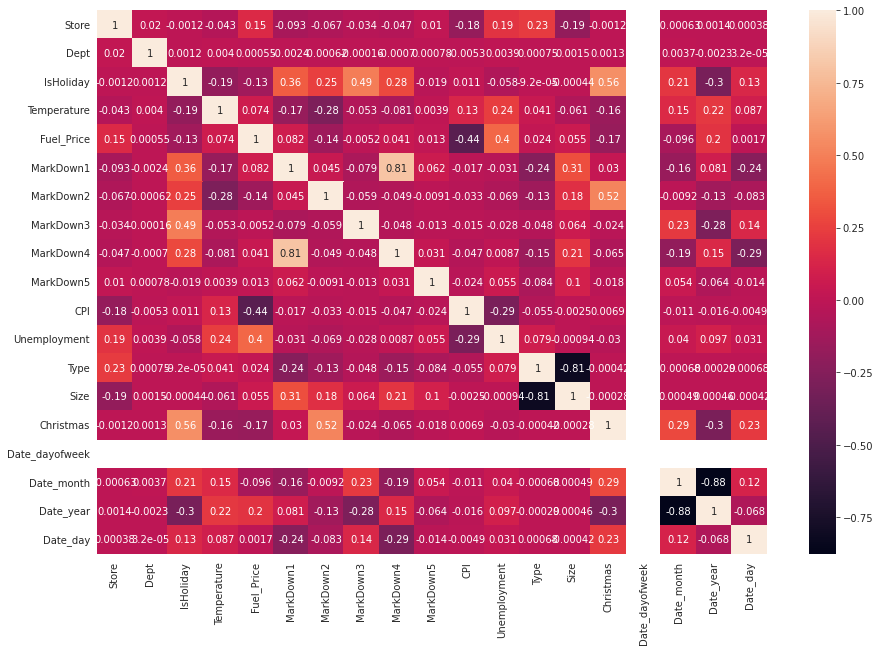

In [31]:
#Checking correlation on testing data.
corr1 = test.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr1, annot=True)
plt.plot()

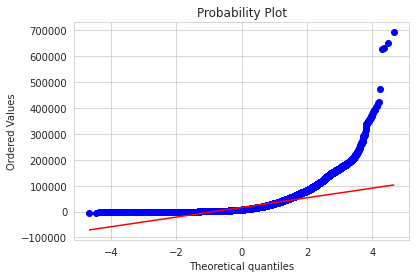

In [32]:
# Now checking residuals
from scipy import stats
import pylab

stats.probplot(training.Weekly_Sales, dist="norm", plot=pylab )
pylab.show()

In [33]:
#Dropping irrelevant variables

In [34]:
features_drop=['Unemployment','CPI','MarkDown5']
training=training.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

# Splitting data in to train and test

In [35]:
#train_x,test_x,train_y,test_y = train_test_split(training,training['Weekly_Sales'],test_size =0.2,random_state=32)

In [36]:
train_x=training.drop(['Weekly_Sales','Date'], axis=1)
train_y=training['Weekly_Sales'] 
test_x=test.drop('Date',axis=1).copy()
train_x.shape, train_y.shape, test_x.shape

((421570, 16), (421570,), (115064, 16))

# Building models & comparing their RMSE values

# 1) Linear regression

In [37]:
Linear = LinearRegression()
Linear.fit(train_x, train_y)
pred_y = Linear.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [38]:
acc_linear=round( Linear.score(train_x, train_y) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:8.67 percent


# 2) Decision Tree

In [42]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=5, min_samples_leaf=2)
dt.fit(train_x, train_y)
y_pred_dt= dt.predict(test_x)
acc_dt = round( dt.score(train_x, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


87.3 percent


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# 3) Random Forest

In [44]:
dt = RandomForestRegressor(n_estimators=10, max_depth=5,min_samples_split=2,min_samples_leaf=1)
dt.fit(train_x, train_y)
y_pred_rf=dt.predict(test_x)
acc_rf= round(dt.score(train_x, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 57 % 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Comparing Models - 
Let's compare the accuracy score of all the regression models used above.

In [45]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,87.30
1,Random Forest,57.75
0,Linear Regression,8.67


Predicting Sales value for test data based on highest score model.

In [46]:
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_dt
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [47]:
submission.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,536.25
1,1_2_2012-11-02,536.25
2,1_3_2012-11-02,536.25
3,1_4_2012-11-02,536.25
4,1_5_2012-11-02,536.25
